# Guided Project: Storytelling Data Visualization on Exchange Rates
In this project, we will clean and analyze European currency exchange rates between 40 countries, specifically the US. We will try to identify any patterns/trends in exchange rates and use it in the context of a real-world event to tell a data story.

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import datetime as dt

exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
exchange_rates

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


In [164]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

### Observations
- 5699 rows x 41 columns
- Provides exchange rates between US and 40 countries
- Datetime descending
- Greek drachma, Maltese lira, Slovak krona have relatively few values for exchange rates
- Data types for most columns are objects with the exceptions of float64s in Iceland krona, Romanian leu, Turkish lira

In [165]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                       'Period\\Unit:' : 'Time'}, inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
exchange_rates

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5694,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214
5695,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
5696,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
5697,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919


In [166]:
euro_to_dollar = exchange_rates.loc[:, ['Time', 'US_dollar']]
euro_to_dollar

,Time,US_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659
...,...,...
5694,2021-01-04,1.2296
5695,2021-01-05,1.2271
5696,2021-01-06,1.2338
5697,2021-01-07,1.2276


In [167]:
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.2713     6
          ..
1.3969     1
1.3503     1
1.2484     1
1.3055     1
1.2084     1
Name: US_dollar, Length: 3528, dtype: int64

In [168]:
mask = euro_to_dollar[euro_to_dollar['US_dollar'] == '-'].index
euro_to_dollar.drop(index=mask, inplace=True)
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype('float64')

In [169]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

In [170]:
euro_to_dollar[29:]

,Time,US_dollar,rolling_mean
29,1999-02-12,1.1244,1.150667
30,1999-02-15,1.1238,1.148830
31,1999-02-16,1.1176,1.146783
32,1999-02-17,1.1253,1.145150
33,1999-02-18,1.1232,1.143817
...,...,...,...
5694,2021-01-04,1.2296,1.211170
5695,2021-01-05,1.2271,1.212530
5696,2021-01-06,1.2338,1.213987
5697,2021-01-07,1.2276,1.215357


In [171]:
US_leaves = dt.datetime(2020, 11, 4).strftime('%Y-%m-%d')
US_leaves

'2020-11-04'

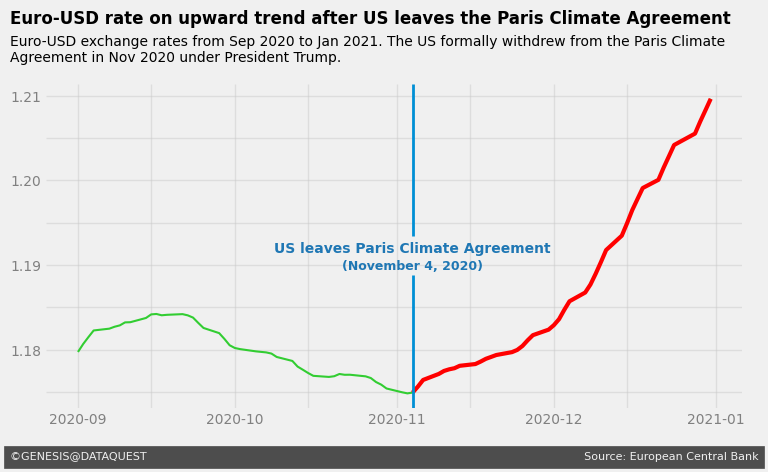

In [284]:
# masks to split line into two colors
full = euro_to_dollar['Time'].between('2020-9', '2021-1')
post = euro_to_dollar['Time'].between('2020-11-04', '2021-1')

# generate line plot
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(euro_to_dollar.loc[full, 'Time'], euro_to_dollar.loc[full, 'rolling_mean'],
        color='limegreen', linewidth=1.5)

# remove non-data ink
ax.tick_params(bottom=False, left=False)
for pos in ['top', 'bottom', 'left', 'right']:
    ax.spines[pos].set_visible(False)
    
# remove redundant data-ink
ax.set_yticklabels(labels=['', '', '1.18', '', '1.19', '', '1.20', '', '1.21'],
                   size=10, color='grey')
ax.set_xticklabels(labels=['2020-09', '', '2020-10', '', '2020-11', '', '2020-12', '', '2021-01'],
                   size=10, color='grey')

# plot second line to show increase after 
ax.plot(euro_to_dollar.loc[post, 'Time'], euro_to_dollar.loc[post, 'rolling_mean'], 
        color='red', linewidth=3)

# insert minimum structure ink
ax.grid(True, alpha=0.5)
ax.axvline(dt.datetime(2020, 11, 4), linewidth=2, ymin=0, ymax=0.41)
ax.axvline(dt.datetime(2020, 11, 4), linewidth=2, ymin=0.53, ymax=1)
#ax.axvline(dt.datetime(2020, 11, 4), linewidth=2, ymin=1.195, ymax=2)
ax.text(dt.datetime(2020, 11, 4), 1.1915, 'US leaves Paris Climate Agreement',
        size=10, ha='center', color='tab:blue', weight='bold')
ax.text(dt.datetime(2020, 11, 4), 1.1895, '(November 4, 2020)',
        size=9, ha='center', color='tab:blue', weight='bold')

# title and subtitle
ax.text(dt.datetime(2020,8,19), 1.2185, 'Euro-USD rate on upward trend after US leaves the Paris Climate Agreement',
        size=12, weight='bold')
ax.text(dt.datetime(2020,8,19), 1.214, 'Euro-USD exchange rates from Sep 2020 to Jan 2021. The US formally withdrew from the Paris Climate\nAgreement in Nov 2020 under President Trump.',
        size=10)

# signature and source label
ax.text(dt.datetime(2020,8,19), 1.167, '©GENESIS@DATAQUEST' + ' '*125 + 'Source: European Central Bank',
       size=8, color='#f0f0f0', backgroundcolor='#4d4d4d')

plt.show()
